In [6]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

Populating the interactive namespace from numpy and matplotlib


/Users/zkid18/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [469]:
import sys 
modules = ['pandas', 'numpy', 'seaborn', 'datetime','matplotlib', 'pip', 'sklearn', 'xgboost']
for name, module in sorted(sys.modules.items()): 
    if hasattr(module, '__version__') and (name in modules): 
        print name, module.__version__ 
        
print "Python version: {}".format(sys.version) 

matplotlib 2.0.2
numpy 1.13.3
pandas 0.20.1
pip 9.0.1
seaborn 0.8.0
sklearn 0.18.1
xgboost 0.6
Python version: 2.7.13 |Anaconda custom (x86_64)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


Processor info : Intel(R) Core(TM) i5-5257U CPU @ 2.70GHz

In [288]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

1. ID - Unique ID (can not be used for predictions)
2. Gender - Sex of the applicant
3. DOB - Date of Birth of the applicant
4. Lead_Creation_Date - Date on which Lead was created
5. City_Code - Anonymised Code for the City
6. City_Category - Anonymised City Feature
7. Employer_Code - Anonymised Code for the Employer
8. Employer_Category1 - Anonymised Employer Feature
9. Employer_Category2 - Anonymised Employer Feature
10. Monthly_Income - Monthly Income in Dollars
11. Customer_Existing_Primary_Bank_Code - Anonymised Customer Bank Code
12. Primary_Bank_Type - Anonymised Bank Feature
13. Contacted - Contact Verified (Y/N)
14. Source - Categorical Variable representing source of lead
15. Source_Category - Type of Source
16. Existing_EMI - EMI of Existing Loans in Dollars
17. Loan_Amount - Loan Amount Requested
18. Loan_Period - Loan Period (Years)
19. Interest_Rate - Interest Rate of Submitted Loan Amount
20. EMI - EMI of Requested Loan Amount in dollars
21. Var1 - Categorical variable with multiple levels
22. Approved -(Target) Whether a loan is Approved or not (0/1)

In [289]:
train_data.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [290]:
train_data.shape

(69713, 22)

In [291]:
test_data.shape

(30037, 21)

In [292]:
#Convert DOB to age
date_format = "%d/%m/%y"
train_data.DOB = pd.to_datetime(train_data.DOB, format=date_format)
train_data.DOB = np.where(train_data.DOB > datetime.now(), train_data.DOB - timedelta(365*100), train_data.DOB)
train_data["Age"] = datetime.now().year - train_data.DOB.apply(lambda x: x.year)

In [293]:
date_format = "%d/%m/%y"
test_data.DOB = pd.to_datetime(test_data.DOB, format=date_format)
test_data.DOB = np.where(test_data.DOB > datetime.now(), test_data.DOB - timedelta(365*100), test_data.DOB)
test_data["Age"] = datetime.now().year - test_data.DOB.apply(lambda x: x.year)

In [294]:
#Transform Lead_Creation_Date to date, month, year, weekday
train_data.Lead_Creation_Date = pd.to_datetime(train_data.Lead_Creation_Date, format=date_format)
train_data['Lead_Creation_Date_year'] = train_data.Lead_Creation_Date.apply(lambda x: x.year)
train_data['Lead_Creation_Date_month'] = train_data.Lead_Creation_Date.apply(lambda x: x.month)
train_data['Lead_Creation_Date_day'] = train_data.Lead_Creation_Date.apply(lambda x: x.day)
train_data['Lead_Creation_Date_day_of_week'] = train_data.Lead_Creation_Date.apply(lambda x: x.weekday())

In [295]:
test_data.Lead_Creation_Date = pd.to_datetime(test_data.Lead_Creation_Date, format=date_format)
test_data['Lead_Creation_Date_year'] = test_data.Lead_Creation_Date.apply(lambda x: x.year)
test_data['Lead_Creation_Date_month'] = test_data.Lead_Creation_Date.apply(lambda x: x.month)
test_data['Lead_Creation_Date_day'] = test_data.Lead_Creation_Date.apply(lambda x: x.day)
test_data['Lead_Creation_Date_day_of_week'] = test_data.Lead_Creation_Date.apply(lambda x: x.weekday())

# Data Cleaning

## Features

Find if there any null values and then deal with it

In [298]:
train_data.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
Age       

In [299]:
test_data.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        3
Lead_Creation_Date                         0
City_Code                                314
City_Category                            314
Employer_Code                           1605
Employer_Category1                      1605
Employer_Category2                      1695
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     4037
Primary_Bank_Type                       4037
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              32
Loan_Amount                            11871
Loan_Period                            11871
Interest_Rate                          20385
EMI                                    20385
Var1                                       0
Age                                        3
Lead_Creat

For the categorical features below, I created a special category for NaN variables

In [300]:
unknown_bank_code = "BNaN"
train_data.Customer_Existing_Primary_Bank_Code = train_data.Customer_Existing_Primary_Bank_Code.fillna(unknown_bank_code)
test_data.Customer_Existing_Primary_Bank_Code = test_data.Customer_Existing_Primary_Bank_Code.fillna(unknown_bank_code)

In [301]:
unknown_bank_category = "N"
train_data.Primary_Bank_Type = train_data.Primary_Bank_Type.fillna(unknown_bank_category)
test_data.Primary_Bank_Type = test_data.Primary_Bank_Type.fillna(unknown_bank_category)

In [302]:
unknown_city_code = "C20000"
train_data.City_Code = train_data.City_Code.fillna(unknown_city_code)
test_data.City_Code = test_data.City_Code.fillna(unknown_city_code)

In [303]:
unknown_city_category = "N"
train_data.City_Category = train_data.City_Category.fillna(unknown_city_category)
test_data.City_Category = test_data.City_Category.fillna(unknown_city_category)

In [304]:
unknown_employer_code = "COM2000000"
train_data.Employer_Code = train_data.Employer_Code.fillna(unknown_employer_code)
test_data.Employer_Code = test_data.Employer_Code.fillna(unknown_employer_code)

In [305]:
unknown_employer_category = "N"
train_data.Employer_Category1 = train_data.Employer_Category1.fillna(unknown_employer_category)
test_data.Employer_Category1 = test_data.Employer_Category1.fillna(unknown_employer_category)

In [306]:
train_data.Employer_Category2 = train_data.Employer_Category2.fillna(0)
test_data.Employer_Category2 = test_data.Employer_Category2.fillna(0)

In [307]:
train_data.Existing_EMI = train_data.Existing_EMI.fillna(0)
test_data.Existing_EMI = test_data.Existing_EMI.fillna(0)

Change missing data about Loan_Period and Loan_Amount by median value. Not very good solution, as age left feature is left-skewed. Better to apply kNN to find age for this missing variable

In [308]:
median_age = train_data["Age"].median()
train_data.Age = train_data.Age.fillna(median_age)

In [309]:
median_age = test_data["Age"].median()
test_data.Age = test_data.Age.fillna(median_age)

Change missing data about Loan_Period, Interest Rate, EMI and Loan_Amount by median value

In [310]:
train_data["isLoanInforamtionMissing"] = np.where(train_data.Loan_Amount.isnull(), 1, 0)
test_data["isLoanInforamtionMissing"] = np.where(test_data.Loan_Amount.isnull(), 1, 0)

In [311]:
median_loan_amount =train_data["Loan_Amount"].median()
train_data.Loan_Amount = train_data.Loan_Amount.fillna(median_loan_amount)

In [312]:
median_loan_amount = test_data["Loan_Amount"].median()
test_data.Loan_Amount = test_data.Loan_Amount.fillna(median_loan_amount)

In [313]:
median_loan_period = train_data["Loan_Period"].median()
train_data.Loan_Period = train_data.Loan_Period.fillna(median_loan_period)

In [314]:
median_loan_period = test_data["Loan_Period"].median()
test_data.Loan_Period = test_data.Loan_Period.fillna(median_loan_period)

In [315]:
train_data["isInterestRateIsnMissing"] = np.where(train_data.Loan_Amount.isnull(), 1, 0)
test_data["isInterestRateIsnMissing"] = np.where(test_data.Loan_Amount.isnull(), 1, 0)

In [316]:
median_interest_rate =train_data["Interest_Rate"].median()
train_data.Interest_Rate = train_data.Interest_Rate.fillna(median_interest_rate)

In [317]:
median_interest_rate =test_data["Interest_Rate"].median()
test_data.Interest_Rate = test_data.Interest_Rate.fillna(median_interest_rate)

In [318]:
EMI_rate = train_data["EMI"].median()
train_data.EMI = train_data.EMI.fillna(EMI_rate)

In [319]:
EMI_rate = test_data["EMI"].median()
test_data.EMI = test_data.EMI.fillna(EMI_rate)

In [320]:
train_data.isnull().sum()

ID                                      0
Gender                                  0
DOB                                    15
Lead_Creation_Date                      0
City_Code                               0
City_Category                           0
Employer_Code                           0
Employer_Category1                      0
Employer_Category2                      0
Monthly_Income                          0
Customer_Existing_Primary_Bank_Code     0
Primary_Bank_Type                       0
Contacted                               0
Source                                  0
Source_Category                         0
Existing_EMI                            0
Loan_Amount                             0
Loan_Period                             0
Interest_Rate                           0
EMI                                     0
Var1                                    0
Approved                                0
Age                                     0
Lead_Creation_Date_year           

In [321]:
test_data.isnull().sum()

ID                                     0
Gender                                 0
DOB                                    3
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Code                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
EMI                                    0
Var1                                   0
Age                                    0
Lead_Creation_Date_year                0
Lead_Creation_Date_month               0
Lead_Creation_Da

## Data Visualization

### Gender

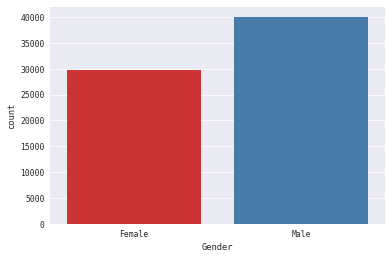

In [274]:
_ = sns.countplot(train_data.Gender, palette='Set1')

### Age

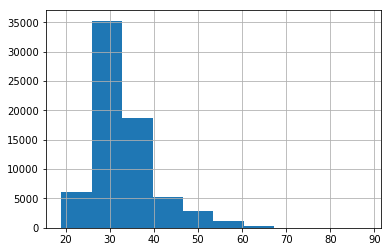

In [61]:
_ = train_data.Age.hist(label='age')

### City category

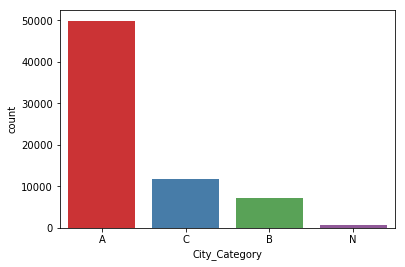

In [62]:
_ = sns.countplot(train_data.City_Category, palette='Set1')

### City code

In [63]:
train_data.City_Code.value_counts(dropna=False, normalize=True)

C10001    0.143534
C10002    0.125025
C10003    0.124293
C10004    0.083804
C10005    0.079830
C10006    0.060303
C10007    0.033014
C10008    0.020790
C10009    0.015151
C10010    0.013802
C10011    0.013343
C2000     0.011679
C10012    0.010287
C10013    0.009842
C10014    0.009096
C10015    0.008652
C10016    0.008494
C10017    0.007002
C10018    0.006815
C10019    0.006758
C10020    0.006370
C10021    0.005940
C10022    0.005710
C10024    0.005136
C10023    0.005036
C10025    0.004290
C10026    0.004276
C10027    0.004103
C10028    0.003659
C10029    0.003329
            ...   
C10617    0.000014
C10616    0.000014
C10715    0.000014
C10564    0.000014
C10514    0.000014
C10612    0.000014
C10481    0.000014
C10446    0.000014
C10695    0.000014
C10692    0.000014
C10574    0.000014
C10648    0.000014
C10573    0.000014
C10610    0.000014
C10571    0.000014
C10606    0.000014
C10637    0.000014
C10507    0.000014
C10708    0.000014
C10709    0.000014
C10702    0.000014
C10544    0.

### Lead Creation Date

In [65]:
train_data.Lead_Creation_Date_year.value_counts(dropna=False, normalize=True)

2016    1.0
Name: Lead_Creation_Date_year, dtype: float64

In [66]:
train_data.Lead_Creation_Date_month.value_counts(dropna=False, normalize=True)

9    0.368992
8    0.321444
7    0.309564
Name: Lead_Creation_Date_month, dtype: float64

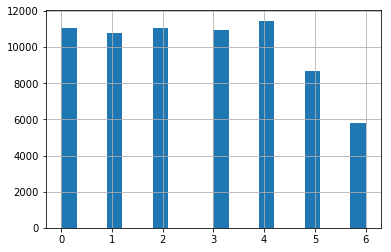

In [67]:
#Monday is 0 and Sunday is 6.
train_data.Lead_Creation_Date_day_of_week.hist(label = "Day of week", bins = 20)

### Employer Code 

In [68]:
train_data.Employer_Code.value_counts(dropna=False, normalize=True)

COM2000000    0.057433
COM0000002    0.006557
COM0000003    0.004649
COM0000004    0.003759
COM0000005    0.003486
COM0000006    0.002798
COM0000007    0.002712
COM0000009    0.002195
COM0000010    0.002080
COM0000013    0.001908
COM0000012    0.001894
COM0000011    0.001880
COM0000014    0.001808
COM0000008    0.001736
COM0000015    0.001693
COM0000017    0.001650
COM0000018    0.001535
COM0000021    0.001535
COM0000019    0.001463
COM0000024    0.001406
COM0000023    0.001363
COM0000020    0.001349
COM0000016    0.001334
COM0000028    0.001306
COM0000022    0.001248
COM0000025    0.001148
COM0000031    0.001148
COM0000027    0.001133
COM0000030    0.001105
COM0000026    0.001105
                ...   
COM0049077    0.000014
COM0023911    0.000014
COM0049071    0.000014
COM0049072    0.000014
COM0046446    0.000014
COM0007920    0.000014
COM0045207    0.000014
COM0040268    0.000014
COM0040267    0.000014
COM0040261    0.000014
COM0016781    0.000014
COM0017018    0.000014
COM0017019 

### Employer Category

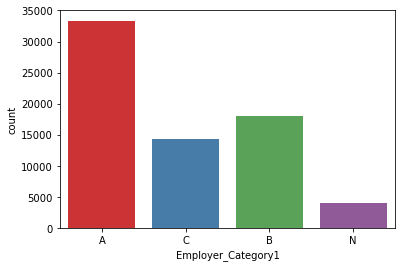

In [69]:
_ = sns.countplot(train_data.Employer_Category1, palette='Set1')

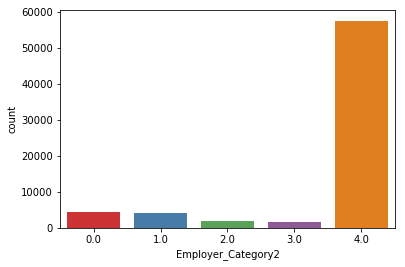

In [70]:
_ = sns.countplot(train_data.Employer_Category2, palette='Set1')

### Monthly Income

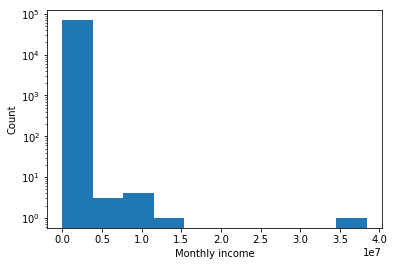

In [71]:
hist(train_data.Monthly_Income, log = True)
xlabel('Monthly income')
ylabel('Count')

### Customer Existing Primary Bank Code

In [72]:
train_data.Customer_Existing_Primary_Bank_Code.value_counts(dropna=False, normalize=True)

B001    0.203693
B002    0.156102
B003    0.136518
BNaN    0.134523
B004    0.101438
B005    0.027547
B006    0.023846
B007    0.017777
B008    0.013558
B009    0.013501
B010    0.013200
B012    0.011320
B013    0.011263
B011    0.011119
B014    0.008695
B015    0.008049
B016    0.007432
B017    0.007102
B018    0.006815
B019    0.006385
B020    0.006026
B021    0.005753
B022    0.005567
B023    0.005093
B024    0.004806
B025    0.004692
B027    0.003845
B026    0.003759
B028    0.003702
B029    0.002956
B030    0.002898
B031    0.002884
B033    0.002697
B032    0.002683
B034    0.002640
B035    0.002310
B038    0.002138
B036    0.002080
B039    0.001966
B037    0.001966
B040    0.001908
B041    0.001406
B042    0.001148
B043    0.001004
B044    0.000861
B046    0.000689
B045    0.000674
B047    0.000560
B048    0.000488
B049    0.000215
B050    0.000172
B054    0.000115
B051    0.000115
B052    0.000100
B053    0.000072
B055    0.000057
B056    0.000057
B057    0.000014
Name: Customer

### Primary Bank Type

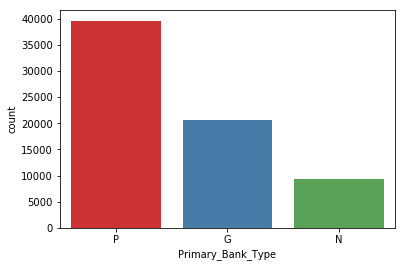

In [73]:
_ = sns.countplot(train_data.Primary_Bank_Type, palette='Set1')

### Contacted 

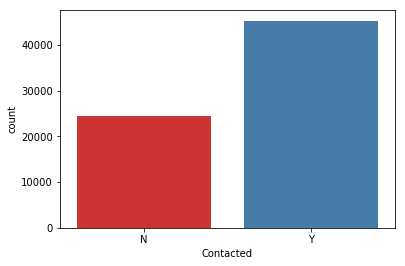

In [77]:
_ = sns.countplot(train_data.Contacted, palette="Set1")

### Source

In [78]:
train_data.Source.value_counts(dropna=False, normalize=True)

S122    0.443714
S133    0.342578
S159    0.064191
S143    0.049930
S127    0.022181
S137    0.020087
S134    0.015036
S161    0.008910
S151    0.008164
S157    0.007274
S153    0.005782
S156    0.003587
S144    0.003486
S158    0.002396
S123    0.000875
S141    0.000660
S162    0.000445
S124    0.000244
S160    0.000100
S150    0.000100
S136    0.000043
S155    0.000043
S129    0.000043
S138    0.000029
S139    0.000029
S135    0.000029
S140    0.000014
S130    0.000014
S154    0.000014
Name: Source, dtype: float64

### Source Category

In [79]:
train_data.Source_Category.value_counts(dropna=False, normalize=True)

B    0.427731
G    0.380255
C    0.163190
E    0.015065
D    0.007131
F    0.006586
A    0.000043
Name: Source_Category, dtype: float64

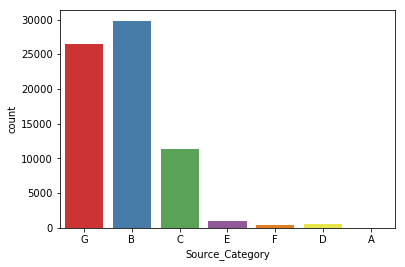

In [80]:
_ = sns.countplot(train_data.Source_Category, palette="Set1")

### Existing EMI

In [87]:
train_data.Existing_EMI.describe()

count     69698.000000
mean        360.742326
std        2287.941514
min           0.000000
25%           0.000000
50%           0.000000
75%         350.000000
max      545436.500000
Name: Existing_EMI, dtype: float64

### Loan Amount

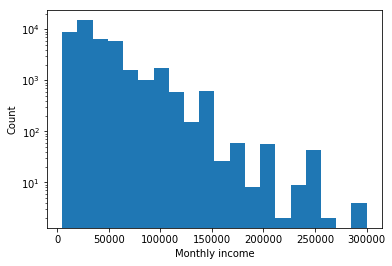

In [90]:
hist(train_data.Loan_Amount.dropna(), log = True, bins=20)
xlabel('Monthly income')
ylabel('Count')

### Loan Period

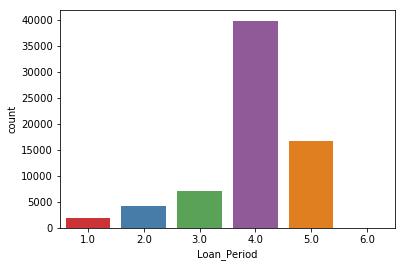

In [109]:
_ = sns.countplot(train_data.Loan_Period, palette="Set1")

In [111]:
train_data.Loan_Period.value_counts(dropna=False, normalize=True)

4.0    0.571509
5.0    0.238931
3.0    0.101280
2.0    0.061207
1.0    0.027060
6.0    0.000014
Name: Loan_Period, dtype: float64

### Interest rate

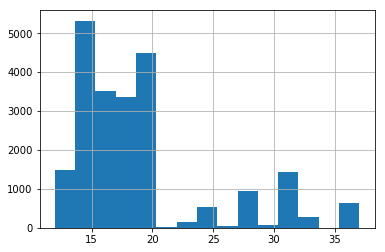

In [113]:
train_data.Interest_Rate.hist(label = "Interest rate", bins=15)

In [116]:
train_data.Interest_Rate.describe()

count    22276.000000
mean        19.213570
std          5.847136
min         11.990000
25%         15.250000
50%         18.000000
75%         20.000000
max         37.000000
Name: Interest_Rate, dtype: float64

### EMI

In [114]:
train_data.EMI.describe()

count    22276.000000
mean      1101.466242
std        752.661394
min        118.000000
25%        649.000000
50%        941.000000
75%       1295.000000
max      13556.000000
Name: EMI, dtype: float64

### Var1

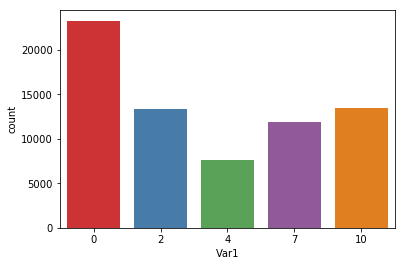

In [123]:
_ = sns.countplot(train_data.Var1, palette="Set1")

### Approved

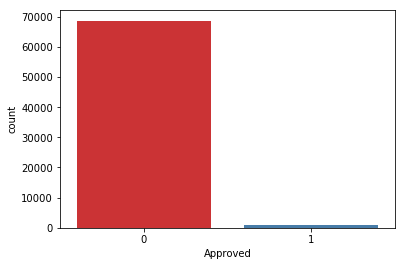

In [124]:
_ = sns.countplot(train_data.Approved, palette = "Set1")

In [126]:
train_data.Approved.value_counts(normalize=True, dropna=True)

0    0.985365
1    0.014635
Name: Approved, dtype: float64

As we can see our data is unbalanced

In [127]:
train_data.dtypes

ID                                             object
Gender                                         object
DOB                                    datetime64[ns]
Lead_Creation_Date                     datetime64[ns]
City_Code                                      object
City_Category                                  object
Employer_Code                                  object
Employer_Category1                             object
Employer_Category2                            float64
Monthly_Income                                float64
Customer_Existing_Primary_Bank_Code            object
Primary_Bank_Type                              object
Contacted                                      object
Source                                         object
Source_Category                                object
Existing_EMI                                  float64
Loan_Amount                                   float64
Loan_Period                                   float64
Interest_Rate               

## Correlation

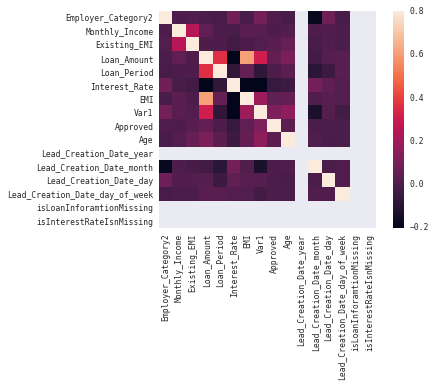

In [128]:
sns.set(context="paper", font="monospace")

corrmat = train_data.corr()
_ = sns.heatmap(corrmat, vmax=.8, square=True)

## Random Forest Algorithm

Algorithms like decision trees and random forests can work with categorical variables fine and LabelEncoder can be used to store values using less disk space.

In [278]:
from sklearn.preprocessing import LabelEncoder

In [322]:
def encode_with_LabelEncoder(df, column_name):
    label_encoder = LabelEncoder()
    label_encoder.fit(df[column_name])
    df[column_name+'_le'] = label_encoder.transform(df[column_name])
    return label_encoder

In [323]:
categorical_columns = ["Gender", "City_Code", "City_Category", "Employer_Code", "Employer_Category1", "Employer_Category2", "Customer_Existing_Primary_Bank_Code", "Primary_Bank_Type", "Contacted", "Source", "Source_Category"]
discrete_columns = ["Loan_Period","Var1", "Lead_Creation_Date_day_of_week", "isLoanInforamtionMissing", "isInterestRateIsnMissing","Age"]
real_columns = ["Monthly_Income", "Existing_EMI", "Loan_Amount", "Interest_Rate", "EMI"]

In [324]:
for column in categorical_columns:
    encode_with_LabelEncoder(train_data, column)

In [325]:
for column in categorical_columns:
    encode_with_LabelEncoder(test_data, column)

In [326]:
categorical_columns = [column_name+'_le' for column_name in categorical_columns]

In [327]:
train_columns = categorical_columns + discrete_columns + real_columns

In [328]:
X_train = train_data[train_columns]
y = train_data.Approved

In [329]:
X_test = test_data[train_columns]

In [154]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=24, n_estimators=500)
RF.fit(X_train, y)
RF.oob_score_

0.98512152429051048

In [153]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=500, n_jobs=24)
cross_val_score(clf, X_train, y, cv=kfold, scoring='roc_auc')

array([ 0.81389447,  0.8268326 ,  0.83264547,  0.82615081,  0.80377631])

In [157]:
RF = RandomForestClassifier(random_state=42, oob_score=True, warm_start=True, n_jobs=24)

roc_auc_scores = []
for n_estimators in arange(24, 1500, 48):
    RF.n_estimators = n_estimators
    %time RF.fit(X_train, y)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_score = mean(cross_val_score(RF, X_train, y, cv=kfold, scoring='roc_auc'))
    roc_auc_scores.append(roc_auc_score)
    print n_estimators, roc_auc_score

CPU times: user 3.11 s, sys: 148 ms, total: 3.26 s
Wall time: 1.17 s
24 0.700998585372
CPU times: user 6.16 s, sys: 134 ms, total: 6.29 s
Wall time: 2.21 s
72 0.775971956464
CPU times: user 7.24 s, sys: 220 ms, total: 7.46 s
Wall time: 3.38 s
120 0.798472525823
CPU times: user 7.09 s, sys: 204 ms, total: 7.3 s
Wall time: 3.19 s
168 0.805427994368
CPU times: user 7.6 s, sys: 250 ms, total: 7.85 s
Wall time: 3.73 s
216 0.810487629894
CPU times: user 7.85 s, sys: 186 ms, total: 8.04 s
Wall time: 4.05 s
264 0.812111398876
CPU times: user 8.2 s, sys: 194 ms, total: 8.4 s
Wall time: 4.17 s
312 0.814551732584
CPU times: user 8.47 s, sys: 201 ms, total: 8.67 s
Wall time: 4.77 s
360 0.817200713938
CPU times: user 9.1 s, sys: 365 ms, total: 9.46 s
Wall time: 5.51 s
408 0.819229947636
CPU times: user 9.54 s, sys: 366 ms, total: 9.91 s
Wall time: 5.96 s
456 0.819350797592
CPU times: user 9.41 s, sys: 338 ms, total: 9.75 s
Wall time: 5.65 s
504 0.82070275581
CPU times: user 10.3 s, sys: 468 ms, tot

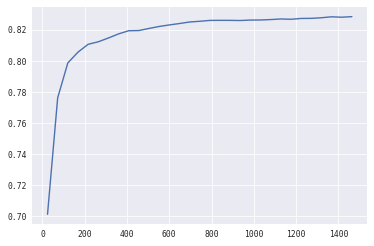

In [158]:
_ = plot(arange(24, 1500, 48)[:len(roc_auc_scores)], roc_auc_scores)

### 1 Submission (RF, 800)

In [336]:
def create_submission(name, prob_aprove):
    final_df = pd.DataFrame(prob_aprove).assign(e=pd.Series(test_data["ID"].copy()).values)
    final_df = final_df.drop(final_df.columns[0], 1)
    columnsTitles=[final_df.columns[1],final_df.columns[0]]
    final_df=final_df.reindex(columns=columnsTitles)
    final_df = final_df.rename(index=str, columns={final_df.columns[0]: "ID", final_df.columns[1]: "Approved"})
    final_df.to_csv(name, header=True, index = False)
    return final_df

In [330]:
RF = RandomForestClassifier(random_state=42, oob_score=True, warm_start=True, n_jobs=24, n_estimators=800)
RF.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=24, oob_score=True, random_state=42,
            verbose=0, warm_start=True)

In [331]:
prob_aprove = RF.predict_proba(X_test)

In [337]:
create_submission("1st_submission.csv", prob_aprove).shape

(30037, 2)

### Tuning parametrs

In [242]:
%%time
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {'criterion': ['gini', 'entropy'], 
                       'max_features': ['sqrt', 'log2', None], 
                       'max_depth': [3, 10, 20, None],
                       'bootstrap': [True, False]}


RF = RandomForestClassifier(random_state=42, n_jobs=24, n_estimators=800)
grid_searcher = RandomizedSearchCV(RF, param_distributions, n_iter=20, 
                                   cv=kfold, scoring='roc_auc',
                                   verbose=True)
grid_searcher.fit(X_train, y)
print 'best score:', grid_searcher.best_score_, grid_searcher.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 70.7min finished


best score: 0.84423080423 {'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10}
CPU times: user 3h 51min 36s, sys: 4min, total: 3h 55min 36s
Wall time: 1h 11min 12s


### 2 submission

In [338]:
RF = RandomForestClassifier(random_state=42, oob_score=True, warm_start=True, n_jobs=24, n_estimators=800, max_depth=10)
RF.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=24, oob_score=True, random_state=42,
            verbose=0, warm_start=True)

In [339]:
prob_aprove = RF.predict_proba(X_test)

In [340]:
create_submission("2nd_submission.csv", prob_aprove).shape

(30037, 2)

### Tuning parametrs to balance sample

In [341]:
searching_for_classes = ['balanced', 
                         {0:2},
                         {1:10}
                        ]

for option in searching_for_classes:
    clf = RandomForestClassifier(class_weight=option, random_state=42, oob_score=True, warm_start=True, n_jobs=24, n_estimators=800, max_depth=10)
    print mean(cross_val_score(clf, X_train, y, cv=kfold, scoring='roc_auc'))

/Users/zkid18/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:488: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


0.838598687901
0.834389646535
0.844655277112


### 3 submission

In [343]:
RF = RandomForestClassifier(class_weight = {1:10}, random_state=42, oob_score=True, warm_start=True, n_jobs=24, n_estimators=800, max_depth=10)
RF.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight={1: 10}, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=24, oob_score=True, random_state=42,
            verbose=0, warm_start=True)

In [344]:
prob_aprove = RF.predict_proba(X_test)
create_submission("3d_submission.csv", prob_aprove).shape

(30037, 2)

## Extra Trees Classifier

The Extra-Tree method (standing for extremely randomized trees), with the main objective of further randomizing tree building in the context of numerical input features, where the choice of the optimal cut-point is responsible for a large proportion of the variance of the induced tree.

In [346]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)
mean(cross_val_score(clf, X_train, y, cv=kfold, scoring='roc_auc'))

0.62062834420473345

Perfomance is much worser than in RF, so I suggested not to contunie worlking on it

## Logistic Regression

For logisitc regression it is important to work with numerical features only. Moreover, they should be scalled and normalized. 

### Converting categorical features to numeric

### Gender 

In [347]:
train_data.Gender = train_data.Gender.map({'Male': 0, 'Female': 1})

In [349]:
test_data.Gender = test_data.Gender.map({'Male': 0, 'Female': 1})

In [348]:
def add_dummies(df, column_name, prefix):
    dummies = pd.get_dummies(df[column_name], prefix=prefix, drop_first=False)
    return pd.concat([df, dummies], axis=1)

### City Category

In [350]:
train_data = add_dummies(train_data, 'City_Category', 'city')
test_data = add_dummies(test_data, 'City_Category', 'city')

### City Code

Frequency encoding. As "City_Code" variable has too many different clases, I will encode this variable through frequency of each class

In [352]:
tariff2frequency = dict(train_data["City_Code"].value_counts(normalize=True))  
train_data["City_Code_freq"] = train_data["City_Code"].map(lambda x: tariff2frequency[x])

In [354]:
tariff2frequency = dict(test_data["City_Code"].value_counts(normalize=True))  
test_data["City_Code_freq"] = test_data["City_Code"].map(lambda x: tariff2frequency[x])

### Employer code

Employer code is non-standardized, as there is too many different meanings. 

Discard this column, but add a flag, if there was a post at all:

In [355]:
train_data["is_employer_code_exist"] = np.where(train_data.Employer_Code.isnull, 0, 1)
test_data["is_employer_code_exist"] = np.where(test_data.Employer_Code.isnull, 0, 1)

### Employer Category

In [356]:
train_data = add_dummies(train_data, 'Employer_Category1', 'Emp_cat1')
train_data = add_dummies(train_data, 'Employer_Category2', 'Emp_cat2')

test_data = add_dummies(test_data, 'Employer_Category1', 'Emp_cat1')
test_data = add_dummies(test_data, 'Employer_Category2', 'Emp_cat2')

### Customer Existing Primary Bank Code

Frequency encoding

In [359]:
tariff2frequency = dict(train_data["Customer_Existing_Primary_Bank_Code"].value_counts(normalize=True))  
train_data["Customer_Existing_Primary_Bank_Code_freq"] = train_data["Customer_Existing_Primary_Bank_Code"].map(lambda x: tariff2frequency[x])

In [360]:
tariff2frequency = dict(test_data["Customer_Existing_Primary_Bank_Code"].value_counts(normalize=True))  
test_data["Customer_Existing_Primary_Bank_Code_freq"] = test_data["Customer_Existing_Primary_Bank_Code"].map(lambda x: tariff2frequency[x])

### Primary_Bank_Type

In [361]:
train_data = add_dummies(train_data, 'Primary_Bank_Type', 'bank_type')
test_data = add_dummies(test_data, 'Primary_Bank_Type', 'bank_type')

### Source

In [362]:
train_data = add_dummies(train_data, 'Source', 'source')
test_data = add_dummies(test_data, 'Source', 'source')

### Source Categories

In [363]:
train_data = add_dummies(train_data, 'Source_Category', 'source_cat')
test_data = add_dummies(test_data, 'Source_Category', 'source_cat')

In [371]:
train_data.columns[40:]

Index([u'city_A', u'city_B', u'city_C', u'city_N', u'City_Code_freq',
       u'is_employer_code_exist', u'Emp_cat1_A', u'Emp_cat1_B', u'Emp_cat1_C',
       u'Emp_cat1_N', u'Emp_cat2_0.0', u'Emp_cat2_1.0', u'Emp_cat2_2.0',
       u'Emp_cat2_3.0', u'Emp_cat2_4.0',
       u'Customer_Existing_Primary_Bank_Code_freq', u'bank_type_G',
       u'bank_type_N', u'bank_type_P', u'source_S122', u'source_S123',
       u'source_S124', u'source_S127', u'source_S129', u'source_S130',
       u'source_S133', u'source_S134', u'source_S135', u'source_S136',
       u'source_S137', u'source_S138', u'source_S139', u'source_S140',
       u'source_S141', u'source_S143', u'source_S144', u'source_S150',
       u'source_S151', u'source_S153', u'source_S154', u'source_S155',
       u'source_S156', u'source_S157', u'source_S158', u'source_S159',
       u'source_S160', u'source_S161', u'source_S162', u'source_cat_A',
       u'source_cat_B', u'source_cat_C', u'source_cat_D', u'source_cat_E',
       u'source_cat_F', u

In [384]:
discrete_columns = ["Gender","Loan_Period","Var1", "Lead_Creation_Date_day_of_week", "isLoanInforamtionMissing", "isInterestRateIsnMissing","Age"] + train_data.columns[40:].tolist()
real_columns = ["Monthly_Income", "Existing_EMI", "Loan_Amount", "Interest_Rate", "EMI"]

In [385]:
train_columns = discrete_columns + real_columns

Some features are missing in test dataset. For example 'source_S130' 'source_S135' 'source_S140' 'source_S154' 'source_S160'. Drop it from train_columns, as there will be a surprise when the algorithm on the input will be given more columns than those on which it was trained

In [388]:
not_in_test = ['source_S130', 'source_S135', 'source_S140', 'source_S154', 'source_S160']

In [389]:
for feature in not_in_test:
    train_columns.remove(feature)

In [444]:
X_train = train_data[train_columns]
y = train_data.Approved

In [445]:
X_test = test_data[train_columns]

### Data normalization

In [446]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [394]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, n_jobs=24)
mean(cross_val_score(clf, X_train_scaled, y, cv=kfold, scoring='roc_auc'))

0.81126539483891702

In [398]:
for column in train_columns:
    train_columns.remove(column)
    
    X_train = train_data[train_columns]
    y = train_data.Approved
    X_test = test_data[train_columns]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = LogisticRegression(random_state=42, n_jobs=24)
    roc_auc_score = mean(cross_val_score(clf, X_train_scaled, y, cv=kfold, scoring='roc_auc'))
    
    print "Removed feature", column, roc_auc_score
    train_columns.append(column)

Removed feature Var1 0.786870355003
Removed feature Age 0.807284885323
Removed feature city_N 0.811383058338
Removed feature Emp_cat1_B 0.811334533507
Removed feature Emp_cat2_1.0 0.811340527592
Removed feature Customer_Existing_Primary_Bank_Code_freq 0.811392836913
Removed feature source_S122 0.811328968295
Removed feature source_S129 0.811322188692
Removed feature source_S137 0.811088618865
Removed feature source_S143 0.8113343909
Removed feature source_S153 0.811837719327
Removed feature source_S158 0.811341029817
Removed feature source_cat_A 0.811316050333
Removed feature source_cat_E 0.811364575688
Removed feature Existing_EMI 0.799362825163
Removed feature Loan_Period 0.811578304839
Removed feature city_C 0.811337459215
Removed feature Emp_cat2_0.0 0.811345879773
Removed feature bank_type_P 0.811338672301
Removed feature source_S136 0.811325898889
Removed feature source_S151 0.811326041455
Removed feature source_S162 0.811282939385
Removed feature Monthly_Income 0.80272861037
Rem

As we can see, feature removing didn't improve our model dramatically

### Tuning parametrs

In [447]:
clf = LogisticRegression(random_state=42, n_jobs=24, class_weight='balanced', penalty='l1')
mean(cross_val_score(clf, X_train_scaled, y, cv=kfold, scoring='roc_auc'))

0.81581609487123163

Still worser, than RF

## SVM 

In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state=42, kernel='linear', class_weight='balanced', probability=True)
print 'linear:', mean(cross_val_score(clf, X_train_scaled, y, cv=kfold, scoring='roc_auc', n_jobs=5))

linear:

As SVM has O(n^2) complexity, it took me more than 2 hours on 'Intel(R) Core(TM) i5-5257U CPU @ 2.70GHz' to compute it. I decided to stop it

## XGBoost

In [420]:
from sklearn import metrics   
from sklearn.grid_search import GridSearchCV

/Users/zkid18/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [421]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain["Approved"].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain["Approved"],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\Report"
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain["Approved"], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [401]:
import xgboost as xgb
from xgboost import XGBClassifier

/Users/zkid18/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [406]:
X_train = train_data[train_columns]
y = train_data.Approved
X_test = test_data[train_columns]

In [407]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4 submission

\Report
AUC Score (Train): 0.909343


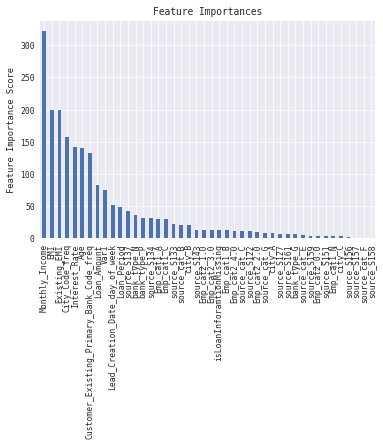

In [422]:
xgb1 = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
#mean(cross_val_score(xgb1, X_train_scaled, y, cv=kfold, scoring='roc_auc', early_stopping_rounds=50))
modelfit(xgb1, train_data, train_columns)

In [423]:
prob_approve = xgb1.predict_proba(X_test)

In [425]:
create_submission("4th_submission.csv", prob_aprove).shape

(30037, 2)

## Tuning parametrs

Tune max_depth and min_child_weight

In [427]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_scaled,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.85004, std: 0.00576, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.84940, std: 0.00637, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.84888, std: 0.00602, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84884, std: 0.00628, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.84980, std: 0.00619, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.85023, std: 0.00519, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.84560, std: 0.00844, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.84628, std: 0.00616, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.84377, std: 0.00623, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.83835, std: 0.00571, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.84101, std: 0.00655, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.84246, std: 0.00793, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 5

In [429]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train_scaled,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch1.best_score_

([mean: 0.85072, std: 0.00545, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.84863, std: 0.00565, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.84858, std: 0.00689, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.85057, std: 0.00580, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.85023, std: 0.00519, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.84986, std: 0.00546, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.84764, std: 0.00572, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.84894, std: 0.00551, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.84765, std: 0.00664, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 4, 'min_child_weight': 4},
 0.8502333041188219)

Tune gamma

In [432]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train_scaled,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.85072, std: 0.00545, params: {'gamma': 0.0},
  mean: 0.85068, std: 0.00550, params: {'gamma': 0.1},
  mean: 0.85007, std: 0.00581, params: {'gamma': 0.2},
  mean: 0.85105, std: 0.00501, params: {'gamma': 0.3},
  mean: 0.85071, std: 0.00666, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.8510538573645661)

\Report
AUC Score (Train): 0.895812


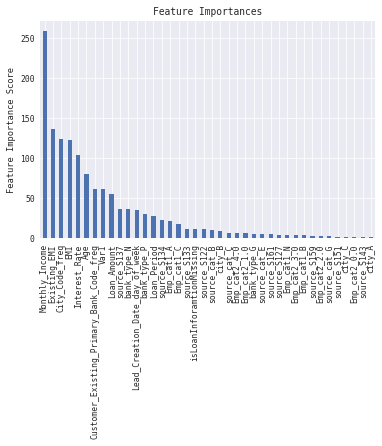

In [433]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train_data, train_columns)

### 5 submission

In [440]:
prob_approve = xgb2.predict_proba(X_test)

In [441]:
create_submission("5th_submission.csv", prob_approve).shape

(30037, 2)

Tune regulization parametr

In [437]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
 min_child_weight=4, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train_scaled,y)
gsearch5.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.82773, std: 0.00936, params: {'reg_alpha': 1e-05},
  mean: 0.82470, std: 0.01019, params: {'reg_alpha': 0.01},
  mean: 0.82393, std: 0.00899, params: {'reg_alpha': 0.1},
  mean: 0.82647, std: 0.00922, params: {'reg_alpha': 1},
  mean: 0.81368, std: 0.00901, params: {'reg_alpha': 100}],
 {'gamma': 0.3},
 0.8510538573645661)

\Report
AUC Score (Train): 0.895605


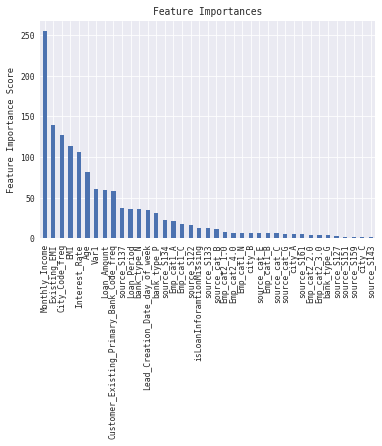

In [438]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train_data, train_columns)

### 6 submission

In [439]:
prob_approve = xgb3.predict_proba(X_test)

create_submission("6th_submission.csv", prob_approve).shape

(30037, 2)

Reducing learning rate and n estimators

\Report
AUC Score (Train): 0.896894


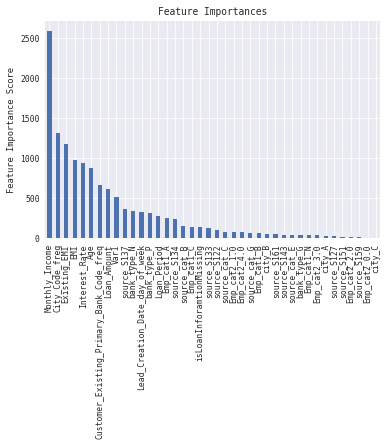

In [442]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train_data, train_columns)

### 7 submission

In [443]:
prob_approve = xgb4.predict_proba(X_test)

create_submission("7th_submission.csv", prob_approve).shape

(30037, 2)